# GeoPython Week - exercise 3

In [1]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read 3D data from csv

In [2]:
data=pd.read_csv('data/3D_area.csv')

In [3]:
# create Impedance column
data['Imp']=data['Density']*data['P_wave']

### Read prediction model from .pkl files

In [4]:
import pickle
address_models='models/'

log_reg = pickle.load(open(address_models+'log_reg_kfold.pkl', 'rb'))

# define what features are used in model
features=['Density', 'P_wave', 'Porosity','Imp' ] #,'V_clay'

In [5]:
data[features]

,Density,P_wave,Porosity,Imp
0,2.290960,2445.250977,0.205456,5601.972940
1,2.295432,2451.536377,0.202640,5627.335271
2,2.326210,2490.181885,0.183163,5792.686057
3,2.366262,2517.036377,0.157320,5955.968629
4,2.391965,2530.386963,0.140630,6052.596830
...,...,...,...,...
22382251,2.327476,2954.727783,0.189770,6877.056666
22382252,2.369497,2993.524902,0.162893,7093.149171
22382253,2.401941,3017.356689,0.142017,7247.513648
22382254,2.402085,3023.667725,0.142009,7263.107806


### Make predictions on 3D data

In [6]:
data['Log_reg_pred']=log_reg.predict(data[features])

In [7]:
data['Log_reg_pred'].value_counts()

0    21852204
1      530052
Name: Log_reg_pred, dtype: int64

## Plot slice of 3D volume 

In [8]:
# take slice of data around time= 152/2 (+-8)
slice_df=data[(data['Time']<(19+2)*4) & (data['Time']>(19-2)*4)].groupby(['Inline', 'Xline']).mean()

In [9]:
slice_df.reset_index(inplace=True)

In [10]:
# visualise only points where oil was detected
data_plot=slice_df[slice_df['Log_reg_pred']>0][['Inline', 'Xline', 'Log_reg_pred']]

Text(0.5, 1.0, 'Log_regression')

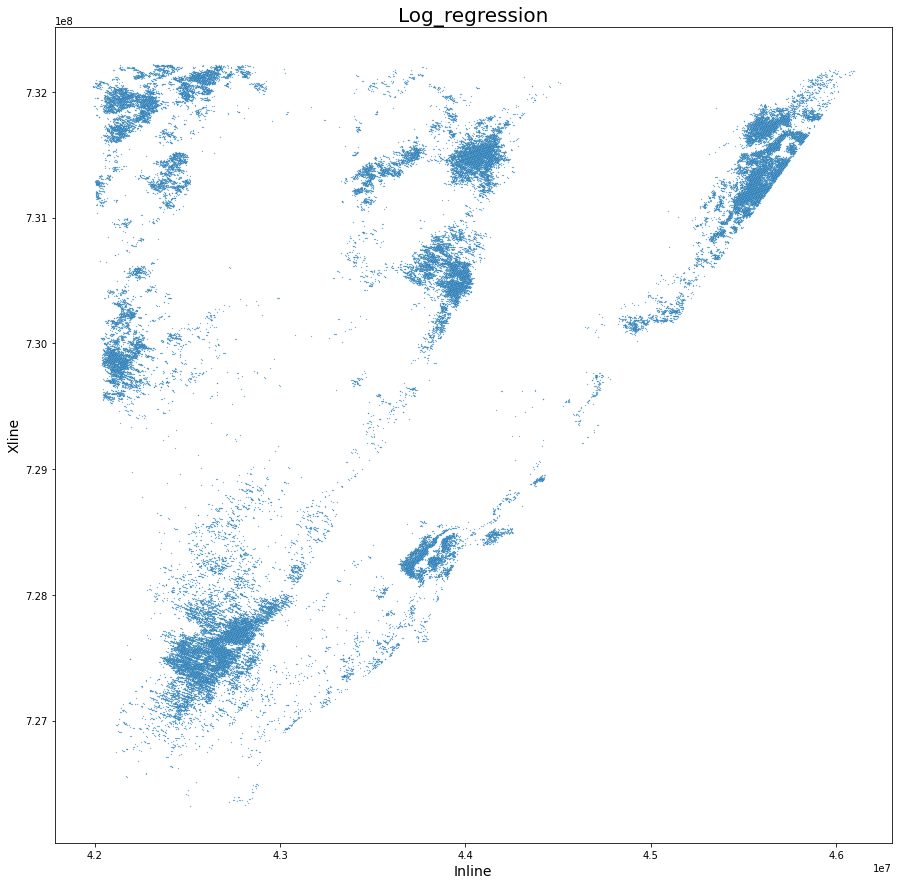

In [11]:
plt.figure(figsize=(15,15))
plt.plot(data_plot.Inline, data_plot.Xline, '.', markersize=0.5)
plt.xlabel ('Inline', size=14)
plt.ylabel('Xline', size=14)
plt.title ('Log_regression', size=20)